In [1]:
from os.path import join

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = '../data'

In [4]:
data = pd.read_csv(join(data_dir, '2024-10-11_metl-designs_source_data.csv'))

# get rid of nan rows - have weird formatting due to avg mkate2 and GFP values
data = data.dropna(axis=0)

# drop any samples where OD was less than .2
data = data[data.od >= .2]

### Divide everything by the average WT fluorescent value

In [5]:
wt_ratio_mean = data.set_index('sample').loc['21'].avgfp_mkate.mean()
wt_mkate2_mean = data.set_index('sample').loc['21'].mkate2_norm.mean()
wt_avgfp_mean = data.set_index('sample').loc['21'].avgfp_norm.mean()

In [6]:
data['avgfp_mkate2_wtnorm'] = data.avgfp_mkate / wt_ratio_mean
data['mkate2_wtnorm'] = data.mkate2_norm / wt_mkate2_mean
data['avgfp_wtnorm'] = data.avgfp_norm / wt_avgfp_mean

### Plot avGFP/mKate2 fluorescent ratios normalized to WT

In [7]:
sample_names = [
    'seq0\ntrain 5', 'seq1\ntrain 5', 'seq2\ntrain 5', 'seq3\ntrain 5', 'seq4\ntrain 5',
    'seq5\nreject 5', 'seq6\nreject 5', 'seq7\nreject 5',  'seq8\nreject 5',  'seq9\nreject 5',
    'seq10\ntrain 10', 'seq11\ntrain 10', 'seq12\ntrain 10', 'seq13\ntrain 10', 'seq14\ntrain 10',
    'seq15\nreject 10', 'seq16\nreject 10', 'seq17\nreject 10', 'seq18\nreject 10', 'seq19\nreject 10',
    'seq20\nbest train', 'seq21\n WT'
]

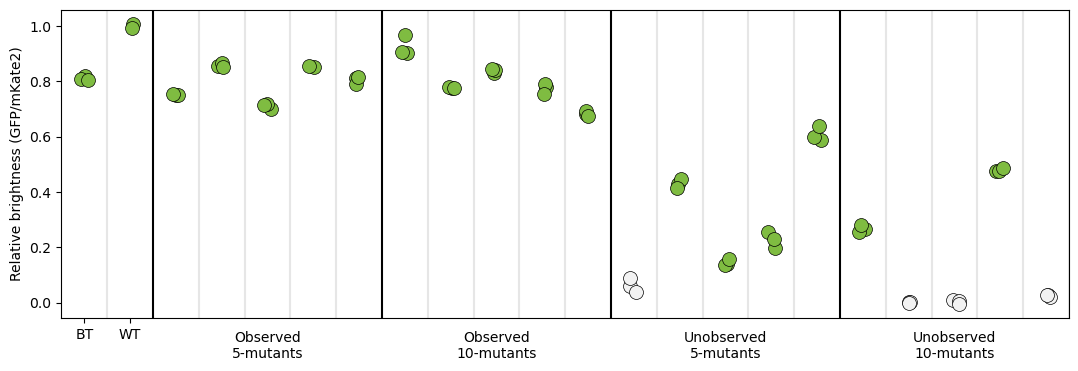

In [20]:
plt.figure(figsize=(13,4))
plot_order = list(map(str, [20,21,0,1,2,3,4,10,11,12,13,14,5,6,7,8,9,15,16,17,18,19]))
# plot_order = ['WT_induced',10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9]

functional = list(map(str, [20,21,0,1,2,3,4,10,11,12,13,14,6,7,8,9,15,18]))

for i, x in enumerate(plot_order):
    if x in functional:
        color='#7fbc41'
    else:
        color='.95'
    sns.stripplot(
        data=data.set_index('sample', drop=False).loc[str(x)],
        x=i,
        y='avgfp_mkate2_wtnorm',
        color=color,
        edgecolor='black',
        linewidth=.5,
        s=10
    )

boundary = [1,6,11,16]
for i in range(0,len(plot_order)):
    if i in boundary:
        plt.axvline(i+.5, color='black')
    else:
        plt.axvline(i+.5, color='.9')

# make division b/w WT and other sample black
# plt.axvline(.5,color='black')

plt.xticks(ticks=[0,1], labels=['BT','WT'])

groups = ['Observed\n5-mutants','Observed\n10-mutants','Unobserved\n5-mutants', 'Unobserved\n10-mutants']
for l, g in zip([4, 4+5, 4+10, 4+15], groups):
    plt.text(l, -.2, g, ha='center')

plt.ylabel('Relative brightness (GFP/mKate2)')
plt.show()

### Plot mKate2 fluorescence normalized to WT

Green designs are functional, grey designs are non-functional.

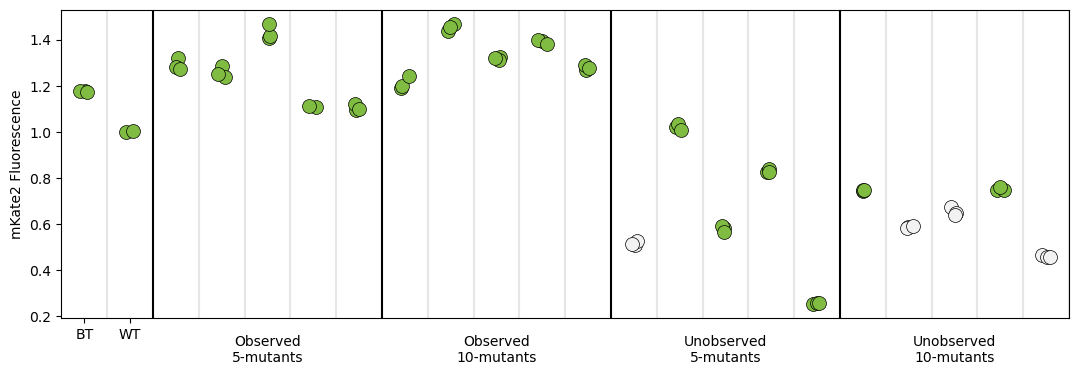

In [21]:
plt.figure(figsize=(13,4))
plot_order = list(map(str, [20,21,0,1,2,3,4,10,11,12,13,14,5,6,7,8,9,15,16,17,18,19]))
# plot_order = ['WT_induced',10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9]

functional = list(map(str, [20,21,0,1,2,3,4,10,11,12,13,14,6,7,8,9,15,18]))

for i, x in enumerate(plot_order):
    if x in functional:
        color='#7fbc41'
    else:
        color='.95'
    sns.stripplot(
        data=data.set_index('sample', drop=False).loc[str(x)],
        x=i,
        y='mkate2_wtnorm',
        color=color,
        edgecolor='black',
        linewidth=.5,
        s=10
    )

boundary = [1,6,11,16]
for i in range(0,len(plot_order)):
    if i in boundary:
        plt.axvline(i+.5, color='black')
    else:
        plt.axvline(i+.5, color='.9')

# make division b/w WT and other sample black
# plt.axvline(.5,color='black')

plt.xticks(ticks=[0,1], labels=['BT','WT'])

groups = ['Observed\n5-mutants','Observed\n10-mutants','Unobserved\n5-mutants', 'Unobserved\n10-mutants']
for l, g in zip([4, 4+5, 4+10, 4+15], groups):
    plt.text(l, -0, g, ha='center')

plt.ylabel('mKate2 Fluorescence')
plt.show()


### Plot avGFP fluorescence normalized to WT

Green baselines are functional, grey baselines are non-functional.

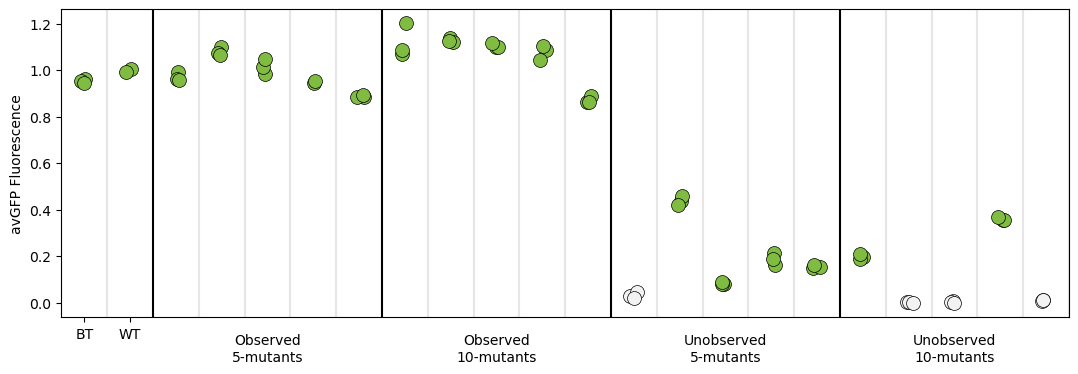

In [22]:
plt.figure(figsize=(13,4))
plot_order = list(map(str, [20,21,0,1,2,3,4,10,11,12,13,14,5,6,7,8,9,15,16,17,18,19]))
# plot_order = ['WT_induced',10,11,12,13,14,15,16,17,18,19,0,1,2,3,4,5,6,7,8,9]

functional = list(map(str, [20,21,0,1,2,3,4,10,11,12,13,14,6,7,8,9,15,18]))

for i, x in enumerate(plot_order):
    if x in functional:
        color='#7fbc41'
    else:
        color='.95'
    sns.stripplot(
        data=data.set_index('sample', drop=False).loc[str(x)],
        x=i,
        y='avgfp_wtnorm',
        color=color,
        edgecolor='black',
        linewidth=.5,
        s=10
    )

boundary = [1,6,11,16]
for i in range(0,len(plot_order)):
    if i in boundary:
        plt.axvline(i+.5, color='black')
    else:
        plt.axvline(i+.5, color='.9')

# make division b/w WT and other sample black
# plt.axvline(.5,color='black')

plt.xticks(ticks=[0,1], labels=['BT','WT'])

groups = ['Observed\n5-mutants','Observed\n10-mutants','Unobserved\n5-mutants', 'Unobserved\n10-mutants']
for l, g in zip([4, 4+5, 4+10, 4+15], groups):
    plt.text(l, -.25, g, ha='center')

plt.ylabel('avGFP Fluorescence')
plt.show()


In [11]:
data.set_index('sample', drop=False, inplace=True)

data['experiment'] = 'metl_designs'
data['n_mutations'] = pd.Series({
    '0':5,
    '1':5,
    '2':5,
    '3':5,
    '4':5,
    '5':5,
    '6':5,
    '7':5,
    '8':5,
    '9':5,
    '10':10,
    '11':10,
    '12':10,
    '13':10,
    '14':10,
    '15':10,
    '16':10,
    '17':10,
    '18':10,
    '19':10,
    '20':3,
    '21':0,
})

data['observed'] = pd.Series({
    '0':True,
    '1':True,
    '2':True,
    '3':True,
    '4':True,
    '5':False,
    '6':False,
    '7':False,
    '8':False,
    '9':False,
    '10':True,
    '11':True,
    '12':True,
    '13':True,
    '14':True,
    '15':False,
    '16':False,
    '17':False,
    '18':False,
    '19':False,
    '20':True,
    '21':True
})

data['seq_id_legacy'] = [f'exp_{sid}' for sid in data['sample']]

data.reset_index(drop=True, inplace=True)

In [13]:
# data.to_csv('data/2024-10-11_metl-designs_source_data.csv')